# APO Work Items - Wrangle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Assess

### Workitems

In [2]:
workitems = pd.read_csv('workitems.csv')
workitems.head()

,assigned_to,created_date,estimate,id,iteration_path,last_state,title,workitem_type
0,"Vitalis, Marc <CORP\vitalim>",2014-10-11T04:38:57.88Z,80.0,797499,NCA\2014,Closed,[Analytics] Ancillary Price Optimization,Change Request
1,"Navarro, Jan Audi Blez M. <CORP\navarrj>",2014-10-11T04:42:06.527Z,NaN,797544,NCA\2014,Closed,[Analytics] Ncs Analytics,Change Request
2,"Navarro, Jan Audi Blez M. <CORP\navarrj>",2014-10-11T04:42:56.663Z,NaN,797559,NCA\2014,Closed,[Analytics] Pricing engine allows comparison o...,Bug
3,"Navarro, Jan Audi Blez M. <CORP\navarrj>",2014-10-11T04:43:01.96Z,NaN,797560,NCA\2013,Closed,[Analytics] Optimization Service Configuration...,Bug
4,"Navarro, Jan Audi Blez M. <CORP\navarrj>",2014-10-11T04:43:14.343Z,NaN,797564,NCA\2014,Closed,[Analytics] PollingIntervalSeconds must be tok...,Bug


In [3]:
workitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 8 columns):
assigned_to       1373 non-null object
created_date      1405 non-null object
estimate          869 non-null float64
id                1405 non-null int64
iteration_path    1405 non-null object
last_state        1405 non-null object
title             1405 non-null object
workitem_type     1405 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 87.9+ KB


In [4]:
workitems.created_date = pd.to_datetime(workitems.created_date)

workitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 8 columns):
assigned_to       1373 non-null object
created_date      1405 non-null datetime64[ns, UTC]
estimate          869 non-null float64
id                1405 non-null int64
iteration_path    1405 non-null object
last_state        1405 non-null object
title             1405 non-null object
workitem_type     1405 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 87.9+ KB


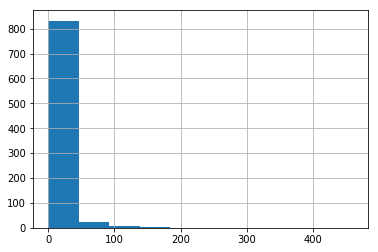

In [5]:
workitems.estimate.hist()

In [6]:
workitems[['created_date', 'estimate']].describe(include = 'all')

,created_date,estimate
count,1405,869.000000
unique,1405,NaN
top,2015-11-09 09:36:34.357000+00:00,NaN
freq,1,NaN
first,2014-10-11 04:38:57.880000+00:00,NaN
last,2018-01-09 05:30:52.510000+00:00,NaN
mean,NaN,5.925201
std,NaN,27.192036
min,NaN,0.000000
25%,NaN,0.000000


In [7]:
workitems[workitems.id.duplicated()]

,assigned_to,created_date,estimate,id,iteration_path,last_state,title,workitem_type


In [8]:
workitems[workitems.estimate == 0]

,assigned_to,created_date,estimate,id,iteration_path,last_state,title,workitem_type
9,"Vitalis, Marc <CORP\vitalim>",2014-10-11 04:44:19.257000+00:00,0.0,797583,NCA\2014,Closed,Analytic: Seat Fee Pricing Optimization,Change Request
21,"Navarro, Jan Audi Blez M. <CORP\navarrj>",2014-10-11 04:46:26.507000+00:00,0.0,797613,NCA\2013,Closed,AncillaryOptimizationRequest properties not pr...,Bug
35,"Vitalis, Marc <CORP\vitalim>",2014-10-29 18:23:33.233000+00:00,0.0,807762,NCA,Closed,import-analytics tool not using live data for ...,Bug
51,"Baucom, Sid <CORP\baucoms>",2015-01-09 11:05:53.707000+00:00,0.0,845649,NCA\2015\01,Closed,[Analytics] FindExperimentAndOptimizationAvail...,Bug
61,"Olson, Justin <CORP\olsonju>",2015-02-24 19:28:56.887000+00:00,0.0,873570,NCA\2015\06 (16Mar - 31Mar),Closed,Fails to import very large decision trees,Bug
62,"Vitalis, Marc <CORP\vitalim>",2015-03-13 17:07:26.530000+00:00,0.0,887472,NCA\Backlog,Closed,import-analytics tool not using live data for ...,Change Request
64,"Navarro, Jan Audi Blez M. <CORP\navarrj>",2015-03-23 01:59:01.580000+00:00,0.0,891430,NCA\2015\06 (16Mar - 31Mar),Closed,Correct CalculatedFrom computation,Bug
66,"Beck, Robert <CORP\beckrob>",2015-03-23 11:41:08.173000+00:00,0.0,891798,NCA\2015\06 (16Mar - 31Mar),Closed,ListDerivedInputParameter should accept Source...,Bug
67,"Beck, Robert <CORP\beckrob>",2015-03-23 23:12:29.850000+00:00,0.0,892179,NCA\2015\06 (16Mar - 31Mar),Closed,RuleType records missing for Analytics 1.2,Bug
68,"Beck, Robert <CORP\beckrob>",2015-03-23 23:17:04.243000+00:00,0.0,892184,NCA\2015\06 (16Mar - 31Mar),Closed,Make sure Old Experiment and Optimization shou...,Bug


In [9]:
workitems[workitems.estimate > 50]

,assigned_to,created_date,estimate,id,iteration_path,last_state,title,workitem_type
0,"Vitalis, Marc <CORP\vitalim>",2014-10-11 04:38:57.880000+00:00,80.0,797499,NCA\2014,Closed,[Analytics] Ancillary Price Optimization,Change Request
34,"Vitalis, Marc <CORP\vitalim>",2014-10-13 22:56:09.130000+00:00,66.0,799056,NCA\2014,Closed,Analytic: Treatment Logging,Change Request
45,"Vitalis, Marc <CORP\vitalim>",2014-12-01 20:58:03.313000+00:00,118.0,826650,NCA\2015\06 (16Mar - 31Mar),Closed,Analytics Factory,Change Request
46,"Olson, Justin <CORP\olsonju>",2014-12-09 22:09:09.940000+00:00,66.0,831062,NCA\2015\01,Closed,Analytics Rules Engine for Decision Tree Proce...,Change Request
47,"Navarro, Jan Audi Blez M. <CORP\navarrj>",2014-12-09 22:33:50.257000+00:00,55.0,831072,NCA\2015\06 (16Mar - 31Mar),Closed,Analytics Cleanup,Change Request
49,"Coverston, Jason <CORP\coversj>",2014-12-23 05:09:44.727000+00:00,66.0,838899,NCA\2015\01,Closed,Implement Control Percentage setting,Change Request
56,"Delos Santos, James <CORP\delossj>",2015-01-28 22:38:12.903000+00:00,60.0,855932,NCA\2015\15 (31Jul),Closed,Support Pluggable Data Connectors,Change Request
60,"Vitalis, Marc <CORP\vitalim>",2015-02-18 20:21:17.197000+00:00,84.0,870426,NCA\2015\13 (3Jul),Closed,[Analytics] 1.3 Cleanup,Change Request
141,"Navarro, Jan Audi Blez M. <CORP\navarrj>",2015-07-02 03:42:04.177000+00:00,460.0,957941,NCA\2015\19 (25 Sep),Closed,Increase GUI Coverage for APO Basic,Change Request
156,"Berrett, Chuck <CORP\berretc>",2015-07-12 03:51:00.700000+00:00,78.0,963382,NCA\2015,Closed,External Interface for APO,Change Request


In [10]:
workitems.last_state.value_counts()

Closed      1320
Proposed      53
Resolved      20
Active        12
Name: last_state, dtype: int64

In [11]:
workitems.workitem_type.value_counts()

Bug               977
Issue             218
Change Request    210
Name: workitem_type, dtype: int64

In [12]:
workitems.iteration_path.value_counts().sort_index()

NCA                                         149
NCA\2013                                      4
NCA\2014                                     33
NCA\2015                                      6
NCA\2015\01                                   6
NCA\2015\02                                   1
NCA\2015\04 (16Feb - 28Feb)                   1
NCA\2015\06 (16Mar - 31Mar)                  22
NCA\2015\07 (01Apr - 15Apr)                  24
NCA\2015\08 (16Apr - 30Apr)                  10
NCA\2015\09 (1May - 15May)                    3
NCA\2015\10 (16May - 31May)                   5
NCA\2015\12 (19Jun)                           6
NCA\2015\13 (3Jul)                            2
NCA\2015\14 (17Jul)                           9
NCA\2015\15 (31Jul)                          27
NCA\2015\16 (14Aug)                          16
NCA\2015\17 (28 Aug)                         14
NCA\2015\18 (11 Sep)                          9
NCA\2015\19 (25 Sep)                          8
NCA\2015\20 (9 Oct)                     

In [13]:
workitems[workitems.iteration_path.str.contains('Queue')]

,assigned_to,created_date,estimate,id,iteration_path,last_state,title,workitem_type
39,"Vitalis, Marc <CORP\vitalim>",2014-11-18 11:06:42.170000+00:00,NaN,818413,NCA\APO\Queue,Closed,Treatment.SamplingRandomNumber is in decimal,Bug
58,"Delos Santos, James <CORP\delossj>",2015-02-18 20:17:33.237000+00:00,14.0,870424,NCA\APO\Queue,Active,[Analytics] Reflections - Navitaire Historical...,Change Request
221,"Berrett, Chuck <CORP\berretc>",2015-09-15 17:44:43.967000+00:00,0.0,1006894,NCA\APO\Queue,Closed,[Analytics][1.3] Condition Addenda does not Re...,Bug
222,"Salvosa-Patolot, Penelope <CORP\salvosp>",2015-09-17 19:57:02.483000+00:00,NaN,1008165,NCA\APO\Queue,Proposed,[Analytics] Complimentary Pricing,Change Request
224,NaN,2015-09-28 20:54:08.410000+00:00,NaN,1013063,NCA\APO\Queue,Closed,[Analytics] Configure Region,Change Request
241,"Coverston, Jason <CORP\coversj>",2015-10-12 07:09:35.687000+00:00,NaN,1021810,NCA\APO\Queue,Proposed,[APO 1.4][NS 3.4.13 QA] Management Console - W...,Bug
250,"Coverston, Jason <CORP\coversj>",2015-10-13 05:16:19.493000+00:00,NaN,1023516,NCA\APO\Queue,Proposed,[APO 1.4][NS 3.4.13 QA] Management Console – P...,Bug
259,"Coverston, Jason <CORP\coversj>",2015-10-14 04:42:49.837000+00:00,NaN,1024496,NCA\APO\Queue,Proposed,[APO 1.4] - Missing hotkeys for Add/Edit Rule ...,Bug
293,"Coverston, Jason <CORP\coversj>",2015-11-03 12:00:12.120000+00:00,NaN,1039027,NCA\APO\Queue,Closed,"[APO 1.4] [CLI/DB] [Product] ""ProductName"" in ...",Issue
296,"Coverston, Jason <CORP\coversj>",2015-11-04 09:05:15.327000+00:00,NaN,1039776,NCA\APO\Queue,Closed,[APO 1.4] [Database] [Product] Data seed to in...,Issue


In [14]:
workitems.assigned_to.value_counts()

Delos Santos, James <CORP\delossj>          283
Berrett, Chuck <CORP\berretc>               200
Panuelos, Kevin Matthew <CORP\panuelk>      193
Navarro, Jan Audi Blez M. <CORP\navarrj>    177
Vitalis, Marc <CORP\vitalim>                169
Lim, Issa <CORP\limmari>                     95
Tungala Jr, Don B. <CORP\tungald>            44
Coverston, Jason <CORP\coversj>              33
Macomb, Melvin <CORP\macombm>                30
De Guzman, Mary Lalaine <CORP\deguzmm>       22
Dela Cruz, Lei <CORP\delacle>                21
Canillas, Rowena H. <CORP\canillr>           17
Moreno, Alexandra Y. <CORP\morenoa>          17
Beck, Robert <CORP\beckrob>                  14
Gonzales, Francis C. Q. <CORP\gonzalf>       12
Salvosa-Patolot, Penelope <CORP\salvosp>      9
Olson, Justin <CORP\olsonju>                  7
Mantes, Geronimo M. M. <CORP\mantesg>         4
NCA                                           3
Lumawig, Mawi <CORP\lumawim>                  3
Tomacruz, Johan <CORP\tomacrj>          

In [15]:
workitems[workitems.assigned_to.isna()]

,assigned_to,created_date,estimate,id,iteration_path,last_state,title,workitem_type
22,NaN,2014-10-11 04:47:15.913000+00:00,NaN,797624,NCA,Closed,[Analytics Service] How can we set the Experim...,Issue
23,NaN,2014-10-11 04:47:19.767000+00:00,NaN,797625,NCA,Closed,[Analytics Service] What should be the TravelR...,Issue
25,NaN,2014-10-11 04:47:33.507000+00:00,NaN,797630,NCA\2014,Closed,[Analytics Service] Incorrect experiment data ...,Bug
28,NaN,2014-10-11 04:48:26.673000+00:00,NaN,797643,NCA\2014,Closed,[Analytics Service] Inconsistent versions of d...,Bug
32,NaN,2014-10-11 04:50:06.030000+00:00,NaN,797677,NCA,Closed,[Analytics Service] Must Be operator in NCA Ru...,Bug
33,NaN,2014-10-11 04:50:09.637000+00:00,NaN,797678,NCA,Closed,[Analytics Service] First Passenger Home City ...,Bug
73,NaN,2015-03-27 02:27:09.487000+00:00,NaN,895539,NCA\2015\06 (16Mar - 31Mar),Closed,[Analytics] Pricing Optimization (DecisionTree...,Bug
80,NaN,2015-04-01 05:40:59.100000+00:00,NaN,898861,NCA\2015\07 (01Apr - 15Apr),Closed,[3.4.10 UPD3 - Analytics] Why is PaxType a req...,Issue
87,NaN,2015-04-06 06:34:40.363000+00:00,4.0,900528,NCA\2015\07 (01Apr - 15Apr),Closed,"[Analytics] ""Parameter with type '' is not sup...",Bug
88,NaN,2015-04-06 06:51:45.930000+00:00,NaN,900535,NCA\2015\07 (01Apr - 15Apr),Closed,[3.4.10 UPD3 - Analytics] Required InputParame...,Issue


### Revisions

In [16]:
revisions = pd.read_csv('revisions.csv')

In [17]:
revisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22984 entries, 0 to 22983
Data columns (total 6 columns):
assigned_to     22848 non-null object
changed_date    22984 non-null object
id              22984 non-null int64
kanban          16931 non-null object
revision        22984 non-null int64
state           22984 non-null object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [18]:
revisions.describe()

,id,revision
count,2.298400e+04,22984.000000
mean,1.267134e+06,13.648408
std,2.647868e+05,18.239684
min,7.974990e+05,1.000000
25%,1.030942e+06,5.000000
50%,1.302400e+06,9.000000
75%,1.478942e+06,16.000000
max,1.789074e+06,200.000000


In [19]:
revisions[revisions.id == 1733729]

,assigned_to,changed_date,id,kanban,revision,state
22591,"Tungala Jr, Don B. <CORP\tungald>",2017-10-26T09:34:39.063Z,1733729,Proposed,1,Proposed
22592,"Tungala Jr, Don B. <CORP\tungald>",2017-10-26T09:34:54.237Z,1733729,Proposed,2,Proposed
22593,"Lim, Issa <CORP\limmari>",2017-10-26T09:35:15.097Z,1733729,Proposed,3,Proposed
22594,"Lim, Issa <CORP\limmari>",2017-10-27T06:02:47.307Z,1733729,Proposed,4,Proposed
22595,"Lim, Issa <CORP\limmari>",2017-10-30T03:43:37.357Z,1733729,Proposed,5,Proposed
22596,"De Guzman, Mary Lalaine <CORP\deguzmm>",2017-10-30T06:51:37.017Z,1733729,Proposed,6,Proposed
22597,"Tungala Jr, Don B. <CORP\tungald>",2017-10-30T07:43:50.557Z,1733729,Proposed,7,Proposed
22598,"Tungala Jr, Don B. <CORP\tungald>",2017-10-30T07:44:13.57Z,1733729,Proposed,8,Proposed
22599,"Lim, Issa <CORP\limmari>",2017-10-30T07:44:20.01Z,1733729,Proposed,9,Proposed
22600,"Lim, Issa <CORP\limmari>",2017-10-30T12:06:40.563Z,1733729,Proposed,10,Proposed


In [20]:
revisions[revisions.id == 887472]

,assigned_to,changed_date,id,kanban,revision,state
1436,"Vitalis, Marc <CORP\vitalim>",2015-03-13T17:07:26.53Z,887472,Proposed,1,Proposed
1437,"Vitalis, Marc <CORP\vitalim>",2015-03-19T23:51:28.87Z,887472,Proposed,2,Proposed
1438,"Vitalis, Marc <CORP\vitalim>",2015-03-26T05:12:28.287Z,887472,Closed,3,Closed
1439,"Vitalis, Marc <CORP\vitalim>",2015-12-30T22:56:12.143Z,887472,Closed,4,Closed
1440,"Vitalis, Marc <CORP\vitalim>",2015-12-30T22:58:08.06Z,887472,Closed,5,Closed
1441,"Vitalis, Marc <CORP\vitalim>",2016-09-17T17:34:23.54Z,887472,Closed,6,Closed
1442,"Vitalis, Marc <CORP\vitalim>",2016-11-21T18:38:12.393Z,887472,Closed,7,Closed


In [21]:
revisions[revisions.state == 'Active'][['id', 'state']].nunique()

id       1096
state       1
dtype: int64

#### Notes

**Quality**

* zero estimates
* missing assigned_to
* simplify assigned_to
* non standard workitem types
* remove rows with last_state not closed or resolved
* workitems in queue are included
* workitems assigned to not part of the team
* workitems not passed to active state

**Tidiness**

* extract dates from iteration path
* remove created date in workitems and replace it with what in revisions
* remove assigned to in workitems and replace it with what in revisions
* add important states on workitems


## Clean

### Quality

#### Zero Estimates

*Set Zero Estimates to np.NaN*

Zero estimates means no effort, and it's impossible to have them. Set them to `np.NaN`

**Code**

In [22]:
workitems.loc[workitems.estimate == 0, 'estimate'] = np.NaN

**Test**

In [23]:
workitems.estimate.value_counts()

2.0      12
4.0      11
1.0       9
3.0       8
30.0      6
0.5       5
8.0       5
5.0       4
32.0      4
24.0      3
1.5       3
6.0       3
48.0      3
40.0      3
66.0      3
50.0      2
42.0      2
36.0      2
39.0      2
12.0      2
14.0      2
15.0      2
60.0      2
18.0      2
19.5      2
118.0     1
34.0      1
120.0     1
5.5       1
47.0      1
         ..
95.0      1
67.0      1
99.0      1
60.5      1
41.5      1
81.0      1
115.0     1
460.0     1
410.0     1
128.0     1
29.0      1
43.0      1
59.0      1
37.0      1
132.0     1
10.0      1
144.0     1
20.0      1
33.0      1
88.0      1
28.0      1
61.0      1
46.0      1
22.0      1
76.0      1
54.0      1
23.0      1
9.0       1
32.5      1
80.0      1
Name: estimate, Length: 70, dtype: int64

In [24]:
workitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 8 columns):
assigned_to       1373 non-null object
created_date      1405 non-null datetime64[ns, UTC]
estimate          147 non-null float64
id                1405 non-null int64
iteration_path    1405 non-null object
last_state        1405 non-null object
title             1405 non-null object
workitem_type     1405 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 87.9+ KB


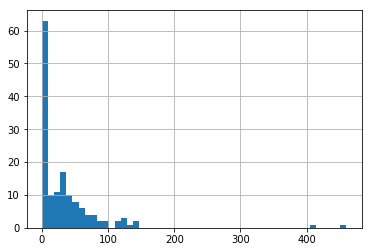

In [25]:
workitems.estimate.hist(bins=50)

#### Non standard workitem types
*Standardize naming for work item types*

Names are different from the first part of work items and the second part, to standardize name we need to change:
* Change Request -> Story

**Code**

In [26]:
workitems.loc[workitems.workitem_type == 'Change Request', 'workitem_type']  = 'Story'

**Test**

In [27]:
workitems.workitem_type.value_counts()

Bug      977
Issue    218
Story    210
Name: workitem_type, dtype: int64

#### Workitems rows with last_state not closed or resolved

*Remove last_state rows not closed or resolved* 

**Code**

In [28]:
workitems = workitems[workitems.last_state.isin(['Closed', 'Resolved'])]

**Test**

In [29]:
workitems.last_state.value_counts()

Closed      1320
Resolved      20
Name: last_state, dtype: int64

#### Workitems in queue are included

*There workitems that are in Queue or Backlog in iteration path. Those means that they are not worked on therefore we need to delete them*

**Code**

In [30]:
workitems[workitems.iteration_path.str.contains('Queue') | workitems.iteration_path.str.contains('Backlog') ]

,assigned_to,created_date,estimate,id,iteration_path,last_state,title,workitem_type
39,"Vitalis, Marc <CORP\vitalim>",2014-11-18 11:06:42.170000+00:00,NaN,818413,NCA\APO\Queue,Closed,Treatment.SamplingRandomNumber is in decimal,Bug
62,"Vitalis, Marc <CORP\vitalim>",2015-03-13 17:07:26.530000+00:00,NaN,887472,NCA\Backlog,Closed,import-analytics tool not using live data for ...,Story
113,NaN,2015-04-27 07:14:35.270000+00:00,NaN,912696,NCA\Backlog,Closed,[3.4.10 UPD3 - Analytics] No Request in EPIC f...,Bug
221,"Berrett, Chuck <CORP\berretc>",2015-09-15 17:44:43.967000+00:00,NaN,1006894,NCA\APO\Queue,Closed,[Analytics][1.3] Condition Addenda does not Re...,Bug
224,NaN,2015-09-28 20:54:08.410000+00:00,NaN,1013063,NCA\APO\Queue,Closed,[Analytics] Configure Region,Story
293,"Coverston, Jason <CORP\coversj>",2015-11-03 12:00:12.120000+00:00,NaN,1039027,NCA\APO\Queue,Closed,"[APO 1.4] [CLI/DB] [Product] ""ProductName"" in ...",Issue
296,"Coverston, Jason <CORP\coversj>",2015-11-04 09:05:15.327000+00:00,NaN,1039776,NCA\APO\Queue,Closed,[APO 1.4] [Database] [Product] Data seed to in...,Issue
298,"Berrett, Chuck <CORP\berretc>",2015-11-05 01:16:21.410000+00:00,NaN,1040138,NCA\APO\Queue,Closed,Review validations specified in FieldValidatio...,Issue
304,"Ferrell, Guy <CORP\ferrelg>",2015-11-09 21:59:45.290000+00:00,NaN,1043168,NCA\APO\Queue,Closed,[Analytics] APO Changes to support the proper ...,Story
310,"Salvosa-Patolot, Penelope <CORP\salvosp>",2015-11-11 03:19:02.757000+00:00,NaN,1044914,NCA\APO\Queue,Closed,[APO 1.4][GUI] Some Tasks are missing in Manag...,Bug


In [31]:
workitems = workitems[~(workitems.iteration_path.str.contains('Queue') | workitems.iteration_path.str.contains('Backlog'))]

**Test**

In [32]:
len(workitems[workitems.iteration_path.str.contains('Queue') | workitems.iteration_path.str.contains('Backlog')])

0

In [33]:
workitems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 1398
Data columns (total 8 columns):
assigned_to       1155 non-null object
created_date      1185 non-null datetime64[ns, UTC]
estimate          128 non-null float64
id                1185 non-null int64
iteration_path    1185 non-null object
last_state        1185 non-null object
title             1185 non-null object
workitem_type     1185 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 83.3+ KB


### Tidiness

#### Remove columns retrievable from revisions

*remove the columns, `assigned_to`, `created_date`, `last_state`*

**Code**

In [35]:
workitems = workitems[['id', 'workitem_type', 'estimate', 'iteration_path', 'title']]

**Test**

In [36]:
workitems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 1398
Data columns (total 5 columns):
id                1185 non-null int64
workitem_type     1185 non-null object
estimate          128 non-null float64
iteration_path    1185 non-null object
title             1185 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 55.5+ KB


In [37]:
workitems.head()

,id,workitem_type,estimate,iteration_path,title
0,797499,Story,80.0,NCA\2014,[Analytics] Ancillary Price Optimization
1,797544,Story,NaN,NCA\2014,[Analytics] Ncs Analytics
2,797559,Bug,NaN,NCA\2014,[Analytics] Pricing engine allows comparison o...
3,797560,Bug,NaN,NCA\2013,[Analytics] Optimization Service Configuration...
4,797564,Bug,NaN,NCA\2014,[Analytics] PollingIntervalSeconds must be tok...


#### Dates in iteration path

*Extract dates in iteration path and move them to `iter_year`, `iter_num`, `iter_start` and `iter_end`*

**Code**

In [38]:
workitems.iteration_path.value_counts()

NCA                                         141
NCA\2015\24 (4 Dec)                          65
NCA\APO\2016\Iteration 11 (23May-3Jun)       44
NCA\2015\21 (23 Oct)                         37
NCA\APO\2016\Iteration 21 (10Oct-21Oct)      35
NCA\APO\2017\1.12\Sprint 6 (24Oct-6Nov)      33
NCA\2014                                     33
NCA\APO\2016\Iteration 20 (26Sep-7Oct)       30
NCA\2015\15 (31Jul)                          27
NCA\APO\2016\Iteration 3 (1Feb-5Feb)         25
NCA\APO\2016\Iteration 17 (15Aug-26Aug)      24
NCA\2015\07 (01Apr - 15Apr)                  24
NCA\APO\2016\Iteration 6 (14Mar-25Mar)       23
NCA\APO\2017\Iteration 27 (2Jan-13Jan)       23
NCA\APO\2017\Iteration 35 (24Apr-5May)       23
NCA\APO\2016\Iteration 12 (6Jun-17Jun)       22
NCA\APO\2017\Iteration 38 (5Jun-16Jun)       22
NCA\2015\06 (16Mar - 31Mar)                  22
NCA\APO\2016\Iteration 4 (15Feb-26Feb)       20
NCA\APO\2016\Iteration 2 (18Jan-29Jan)       20
NCA\APO\2016\Iteration 23 (7Nov-18Nov)  

In [39]:
workitems.iteration_path.str.extract(r'NCA\\APO\\(?P<iter_year>\d{4})\\Iteration\s(?P<iter>\d+)\s\((?P<iter_startday>\d+)(?P<iter_startmon>\w{3})-(?P<iter_endday>\d+)(?P<iter_endmon>\w{3})\)')

,iter_year,iter,iter_startday,iter_startmon,iter_endday,iter_endmon
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN
